In [1]:
from ttfemesh.domain import RectangleFactory
from ttfemesh.quadrature import GaussLegendre2D
from ttfemesh.mesh import SubdomainMesh2D

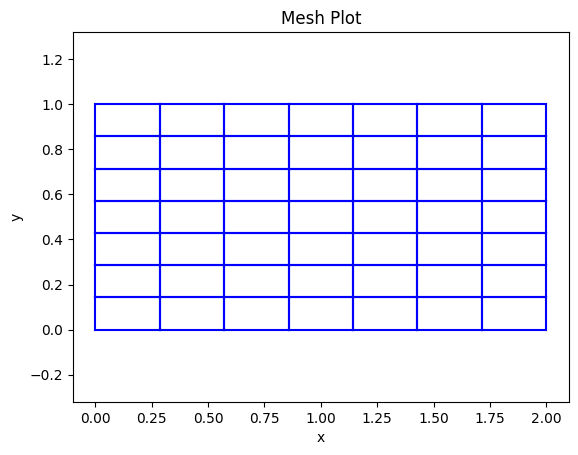

In [2]:
lower_left = (0, 0)
upper_right = (2, 1)
rectangle = RectangleFactory.create(lower_left, upper_right)
quadrature_rule = GaussLegendre2D()
mesh_size_exponent = 3
mesh = SubdomainMesh2D(rectangle, quadrature_rule, mesh_size_exponent)

mesh.plot()

In [3]:
import ttfemesh
help(ttfemesh)

Help on package ttfemesh:

NAME
    ttfemesh - TTFEMesh is a Python package for finite element methods using tensor train decompositions.

DESCRIPTION
    The package implements a framework for creating and manipulating finite element meshes in the tensor train format.
    This provides the backbone for solving partial differential equations using tensor train decompositions.
    The package is designed to be flexible and extensible, allowing users to create their own finite element meshes and build their own solvers.

    The package is built on top of the `torchtt` package, which provides a framework for handling tensor train decompositions, but this might change in the future.
    This package is currently in a prototype stage, and the API is subject to change.

    See the documentation for more details.

    Example usage:
        >>> from ttfemesh.domain import RectangleFactory
        >>> from ttfemesh.quadrature import GaussLegendre2D
        >>> from ttfemesh.mesh import Subdo